In [100]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import seaborn as sns

In [75]:
df = pd.read_csv('E:\\Datasets\\train.csv',usecols = ['GarageQual','FireplaceQu','SalePrice'])

In [76]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [77]:
df.isnull().mean()

FireplaceQu    0.472603
GarageQual     0.055479
SalePrice      0.000000
dtype: float64

In [78]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=2)

In [80]:
x_train.isnull().sum()

FireplaceQu    557
GarageQual      65
dtype: int64

In [81]:
x_train['imputed_GarageQual'] =x_train['GarageQual']
x_test['imputed_GarageQual'] =x_test['GarageQual']
 
    
x_train['imputed_FireplaceQu'] =x_train['FireplaceQu']
x_test['imputed_FireplaceQu'] =x_test['FireplaceQu']
 
x_train.head(3)

,FireplaceQu,GarageQual,imputed_GarageQual,imputed_FireplaceQu
455,TA,TA,TA,TA
863,NaN,TA,TA,NaN
504,Fa,TA,TA,Fa


In [82]:
x_test.head(3)

,FireplaceQu,GarageQual,imputed_GarageQual,imputed_FireplaceQu
503,TA,TA,TA,TA
101,TA,TA,TA,TA
608,Gd,TA,TA,Gd


In [83]:
random_values = x_train['GarageQual'].dropna().sample(x_train['GarageQual'].isnull().sum()).values

random_values_test = x_test['GarageQual'].dropna().sample(x_test['GarageQual'].isnull().sum()).values


random_values_fireque = x_train['FireplaceQu'].dropna().sample(x_train['FireplaceQu'].isnull().sum()).values

random_value_firetest = x_train['FireplaceQu'].dropna().sample(x_train['FireplaceQu'].isnull().sum()).values

random_values

array(['TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'Fa',
       'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA',
       'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'Gd', 'TA',
       'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'Fa', 'TA', 'TA',
       'Fa', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA',
       'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA'],
      dtype=object)

In [84]:
# we apply Boolean indexing or masking on imputed columns

x_train['imputed_GarageQual'][x_train['imputed_GarageQual'].isnull()]

x_test['imputed_GarageQual'][x_test['imputed_GarageQual'].isnull()]


x_train['imputed_FireplaceQu'][x_train['imputed_FireplaceQu'].isnull()]
x_train['imputed_FireplaceQu'][x_train['imputed_FireplaceQu'].isnull()]

863     NaN
1091    NaN
590     NaN
1446    NaN
453     NaN
       ... 
725     NaN
587     NaN
607     NaN
1287    NaN
1192    NaN
Name: imputed_FireplaceQu, Length: 557, dtype: object

In [85]:
x_train['imputed_GarageQual'][x_train['imputed_GarageQual'].isnull()] = random_values

x_test['imputed_GarageQual'][x_test['imputed_GarageQual'].isnull()] = random_values_test


x_train['imputed_FireplaceQu'][x_train['imputed_FireplaceQu'].isnull()] = random_values_fireque
x_test['imputed_FireplaceQu'][x_test['imputed_FireplaceQu'].isnull()] = random_value_firetest


In [86]:
x_train

,FireplaceQu,GarageQual,imputed_GarageQual,imputed_FireplaceQu
455,TA,TA,TA,TA
863,NaN,TA,TA,TA
504,Fa,TA,TA,Fa
1413,Gd,TA,TA,Gd
1389,Gd,TA,TA,Gd
...,...,...,...,...
466,Po,TA,TA,Po
299,Gd,TA,TA,Gd
493,Fa,TA,TA,Fa
527,Gd,TA,TA,Gd


In [87]:
x_test

,FireplaceQu,GarageQual,imputed_GarageQual,imputed_FireplaceQu
503,TA,TA,TA,TA
101,TA,TA,TA,TA
608,Gd,TA,TA,Gd
1089,Gd,TA,TA,Gd
819,Gd,TA,TA,Gd
...,...,...,...,...
816,Gd,TA,TA,Gd
1273,Gd,TA,TA,Gd
285,NaN,TA,TA,TA
194,NaN,TA,TA,TA


In [117]:
comparison = pd.concat([
    
        x_train['GarageQual'].value_counts() / len(x_train['GarageQual'].dropna()),
        x_train['imputed_GarageQual'].value_counts() / len(x_train)
    
],axis=1)

comparison.columns = ['original','imputed'] 

comparison

,original,imputed
TA,0.951043,0.950342
Fa,0.037171,0.037671
Gd,0.009973,0.010274
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [120]:
x_train['SalePrice'] = df['SalePrice']
x_train

,FireplaceQu,GarageQual,imputed_GarageQual,imputed_FireplaceQu,SalePrice
455,TA,TA,TA,TA,175500
863,NaN,TA,TA,TA,132500
504,Fa,TA,TA,Fa,147000
1413,Gd,TA,TA,Gd,257000
1389,Gd,TA,TA,Gd,131000
...,...,...,...,...,...
466,Po,TA,TA,Po,167000
299,Gd,TA,TA,Gd,158500
493,Fa,TA,TA,Fa,155000
527,Gd,TA,TA,Gd,446261


In [94]:
compare = pd.concat([
    
        x_train['FireplaceQu'].value_counts() / len(x_train['FireplaceQu'].dropna()),
        x_train['imputed_FireplaceQu'].value_counts() / len(x_train)
    
],axis=1)

compare.columns = ['original','imputed'] 

compare

,original,imputed
Gd,0.494272,0.488870
TA,0.412439,0.417808
Fa,0.040917,0.041952
Po,0.027823,0.027397
Ex,0.024550,0.023973


C:\Users\Moavia computer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Moavia computer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Moavia computer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

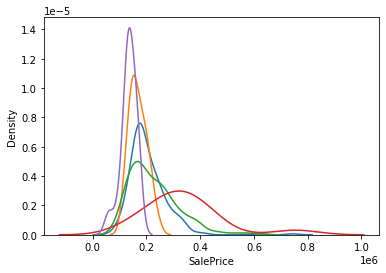

In [128]:
for category in x_train['FireplaceQu'].dropna().unique():
    sns.distplot(x_train[x_train['FireplaceQu']==category] ['SalePrice'],hist = False)
   

C:\Users\Moavia computer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Moavia computer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Moavia computer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

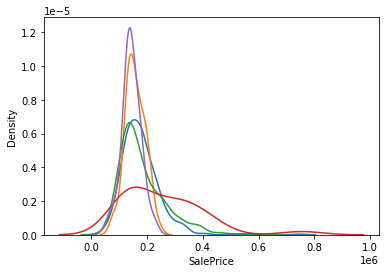

In [132]:
for category in x_train['FireplaceQu'].dropna().unique():
    sns.distplot(x_train[x_train['imputed_FireplaceQu'] == category]['SalePrice'],hist=False,label=category)


C:\Users\Moavia computer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Moavia computer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Moavia computer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

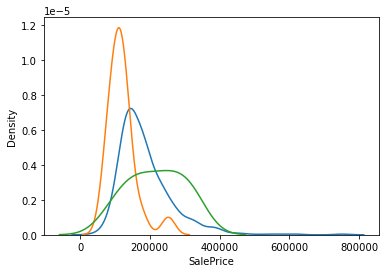

In [133]:
for category in x_train['GarageQual'].dropna().unique():
    sns.distplot(x_train[x_train['GarageQual']==category] ['SalePrice'],hist = False)

C:\Users\Moavia computer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Moavia computer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Moavia computer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

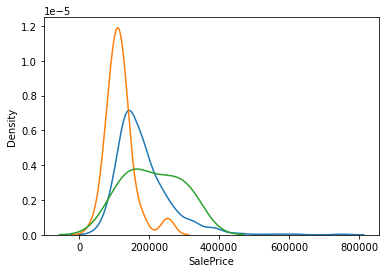

In [134]:
for category in x_train['imputed_GarageQual'].dropna().unique():
    sns.distplot(x_train[x_train['imputed_GarageQual']==category] ['SalePrice'],hist = False)